In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/shiyudie/Desktop/total_dataset.csv")
df.head()

,order_id,customer_id,Response_time,Order_dispatch_time,Shipping_time,Order_delivery_time,Lead_time,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,payment_value,payment_installments,Use_Discount
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0.0,2.0,6.0,8.0,7.0,4.0,29.99,8.72,40.0,268.0,4.0,38.71,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0,0.0,12.0,13.0,5.0,4.0,118.70,22.76,29.0,178.0,1.0,141.46,1.0,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,0.0,0.0,9.0,9.0,17.0,5.0,159.90,19.22,46.0,232.0,1.0,179.12,3.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0.0,3.0,9.0,13.0,12.0,5.0,45.00,27.20,59.0,468.0,3.0,72.20,1.0,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0.0,0.0,1.0,2.0,9.0,5.0,19.90,8.72,38.0,316.0,4.0,28.62,1.0,0.0


In [30]:
df = df.drop('customer_id',axis=1)

In [31]:
# 直接根据 review_score 的值设置 New_score 为1(高于 3)或 0(小于等于 3)
df['review_class']= [1 if value >= 3 else 0 for value in df['review_score']]

df.head()

,order_id,Response_time,Order_dispatch_time,Shipping_time,Order_delivery_time,Lead_time,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,payment_value,payment_installments,Use_Discount,review_class
0,e481f51cbdc54678b7cc49136f2d6af7,0.0,2.0,6.0,8.0,7.0,4.0,29.99,8.72,40.0,268.0,4.0,38.71,1.0,1.0,1
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,0.0,12.0,13.0,5.0,4.0,118.70,22.76,29.0,178.0,1.0,141.46,1.0,0.0,1
2,47770eb9100c2d0c44946d9cf07ec65d,0.0,0.0,9.0,9.0,17.0,5.0,159.90,19.22,46.0,232.0,1.0,179.12,3.0,0.0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,0.0,3.0,9.0,13.0,12.0,5.0,45.00,27.20,59.0,468.0,3.0,72.20,1.0,0.0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,0.0,0.0,1.0,2.0,9.0,5.0,19.90,8.72,38.0,316.0,4.0,28.62,1.0,0.0,1


In [32]:
df = df.drop('review_score',axis=1)

In [33]:
df['Use_Discount']=df['Use_Discount'].astype(int)
df.dtypes

order_id                       object
Response_time                 float64
Order_dispatch_time           float64
Shipping_time                 float64
Order_delivery_time           float64
Lead_time                     float64
price                         float64
freight_value                 float64
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
payment_value                 float64
payment_installments          float64
Use_Discount                    int64
review_class                    int64
dtype: object

<Axes: >

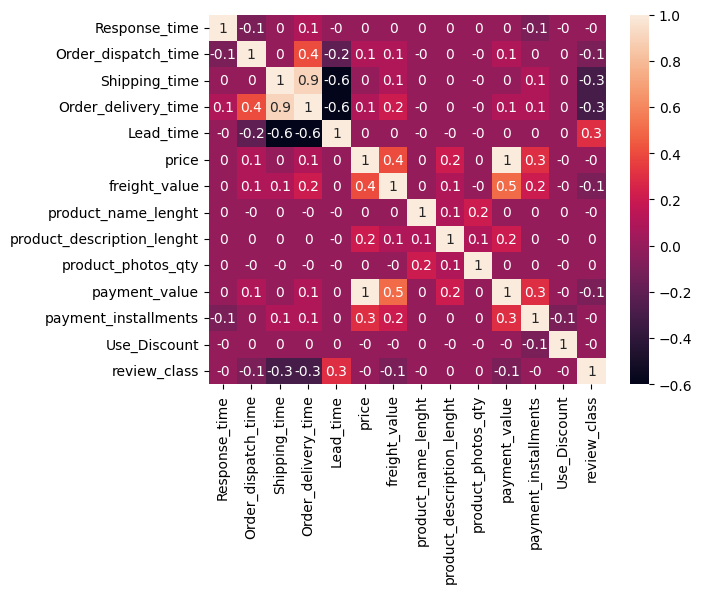

In [34]:
import seaborn as sns  # 导入Seaborn库

# 假设 df 是您的DataFrame
correlation_matrix = df.select_dtypes(include=['float64','int64']).corr().round(1)

# 使用Seaborn的heatmap函数绘制相关性矩阵的热图
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
df = df.drop('Order_delivery_time',axis=1)
df = df.drop('price',axis=1)

df.head()
df.shape

(85683, 13)

In [36]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

# 获取需要缩放的列名
columns_to_scale = df.select_dtypes(include=['float64']).columns

# 对需要缩放的列进行缩放
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [37]:
X = df.iloc[:,1:12]
Y= df.iloc[:,-1]

In [38]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(68546, 11)
(17137, 11)
(68546,)
(17137,)


In [51]:
pip install imbalanced-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# 假设 X 和 Y 已经定义好，并且您已经有了 X_train 和 Y_train

# 打印原始的类别分布
print("原始类别分布:", Counter(Y_train))

# 初始化SMOTE对象
sm = SMOTE(random_state=42)

# 应用SMOTE算法在训练数据上进行过采样
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

# 打印经过SMOTE处理后的类别分布
print("经过SMOTE处理后的类别分布:", Counter(Y_train_res))

原始类别分布: Counter({1: 59577, 0: 8969})
经过SMOTE处理后的类别分布: Counter({1: 59577, 0: 59577})


In [39]:
#balance the test data
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import classification_report
f#rom imblearn.over_sampling import RandomOverSampler

#oversampler = RandomOverSampler(random_state=42)
#resampled_train_x, resampled_train_y = oversampler.fit_resample(X_train, Y_train)

In [53]:
# balanced_df只包括balanced后的X_train和Y_train
balanced_df = pd.DataFrame(X_train_res, columns = df.drop(columns=['review_class']).columns)
balanced_df['review_class'] = Y_train_res


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [43]:
rf_classifier = RandomForestClassifier()

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
# 在训练集上训练模型
rf_classifier.fit(X_train_res, Y_train_res)

# 在测试集上进行预测
Y_pred = rf_classifier.predict(X_test)

# 在训练集上进行预测
Y_pred_train = rf_classifier.predict(X_train_res)

In [55]:
# tell the accuracy of test data
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Accuracy: 0.8884285464200269
Precision: 0.9054527263631816
Recall: 0.9731182795698925
F1_score: 0.9380668566986267


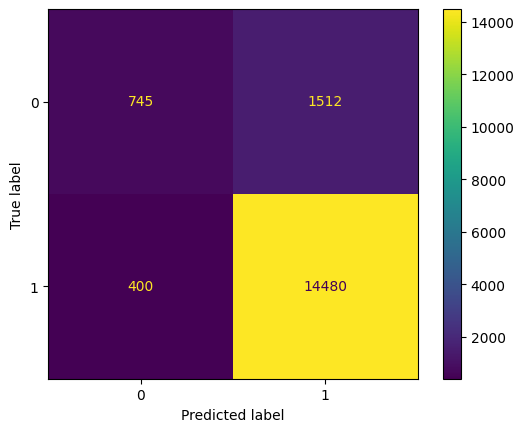

In [56]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# build a confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_classifier.classes_)

disp.plot()
plt.show()